In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stasts

In [107]:
df1 = pd.read_csv('17_Data.csv')

In [108]:
# 1.

In [109]:
connection_status = ['1일차접속여부', '3일차접속여부', '5일차접속여부',
       '7일차접속여부', '9일차접속여부', '11일차접속여부', '14일차접속여부']

In [110]:
df2 = df1[connection_status]

In [111]:
def func1(col):
    return col.sum() / len(col)

df2.apply(func1, axis=0) # axis = 1 : Row 단위로 계산 / axis=0 : column 단위로 계산

1일차접속여부     0.431060
3일차접속여부     0.298196
5일차접속여부     0.257002
7일차접속여부     0.240212
9일차접속여부     0.218155
11일차접속여부    0.205917
14일차접속여부    0.198946
dtype: float64

In [112]:
# 2.

In [113]:
df1['os타입'].value_counts()

os타입
Android    31830
iOS        23979
Name: count, dtype: int64

In [114]:
cond1 = df1['os타입'] == 'Android'
cond2 = df1['os타입'] == 'iOS'

df1_android = df1.loc[cond1]
df1_ios = df1.loc[cond2]

In [115]:
df1_android[connection_status].apply(func1)

1일차접속여부     0.434056
3일차접속여부     0.289915
5일차접속여부     0.242476
7일차접속여부     0.223877
9일차접속여부     0.202451
11일차접속여부    0.190952
14일차접속여부    0.185265
dtype: float64

In [116]:
df1_ios[connection_status].apply(func1)

1일차접속여부     0.427082
3일차접속여부     0.309187
5일차접속여부     0.276283
7일차접속여부     0.261896
9일차접속여부     0.239001
11일차접속여부    0.225781
14일차접속여부    0.217107
dtype: float64

In [117]:
df1_ios[connection_status].apply(func1) - df1_android[connection_status].apply(func1)

1일차접속여부    -0.006974
3일차접속여부     0.019272
5일차접속여부     0.033808
7일차접속여부     0.038019
9일차접속여부     0.036550
11일차접속여부    0.034829
14일차접속여부    0.031841
dtype: float64

In [118]:
# 3.

In [119]:
cond1 = (df1['1일차접속여부'] == 1)
df1.loc[cond1].describe()

,Unnamed: 0,1일차접속여부,3일차접속여부,5일차접속여부,7일차접속여부,9일차접속여부,11일차접속여부,14일차접속여부,최종클리어스테이지,마지막도전스테이지,획득아이템수,사용아이템수,루비교환에사용된현금,캐릭터개방에사용된현금,스테이지개방에사용된현금,루비충전에사용된현금,가챠뽑기에사용된현금,스테이지_내_구매현금,구매횟수
count,24057.000000,24057.0,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,20752.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,24057.000000,203.000000
mean,27910.275304,1.0,0.583988,0.504843,0.469801,0.433304,0.406784,0.388993,22.375723,19.105458,27.104668,23.552189,0.028682,0.448934,0.004988,0.938604,2.410733,3.754375,1.192118
std,16099.996691,0.0,0.492906,0.499987,0.499098,0.495542,0.491244,0.487532,28.555554,26.906865,26.354477,26.511241,0.690817,4.258013,0.244613,5.865435,14.108534,48.601158,1.673183
min,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13936.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,3.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27752.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,16.000000,13.000000,19.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41882.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,27.000000,36.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,55807.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,851.000000,852.000000,321.000000,321.000000,40.000000,80.000000,12.000000,140.000000,840.000000,2098.000000,24.000000


In [120]:
# 4.

In [121]:
df1['총접속수'] = df1[connection_status].sum(axis=1) # Row 단위 별로 유저들의 통계량의 합을 계산
df1['총접속수'].describe()

count    55809.000000
mean         1.849487
std          2.442221
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max          7.000000
Name: 총접속수, dtype: float64

In [122]:
cond1 = df1['총접속수'] == 7
df1_1 = df1.loc[cond1]

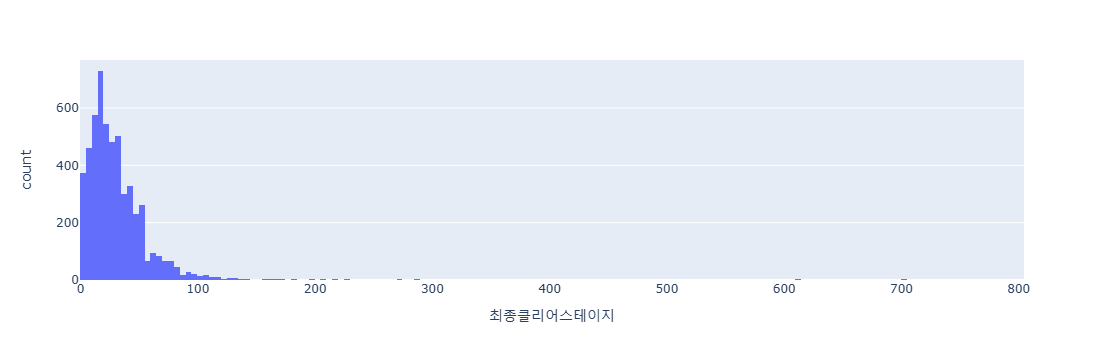

In [123]:
px.histogram(df1_1, x='최종클리어스테이지')

In [124]:
# 5.

In [125]:
df1['최종클리어스테이지'].value_counts().head(10)

최종클리어스테이지
10.0    4767
1.0     4141
11.0    2754
2.0     1805
4.0     1713
15.0    1645
3.0     1592
5.0     1385
0.0     1357
6.0     1210
Name: count, dtype: int64

In [126]:
# 6.

In [127]:
cond4 = df1['최종클리어스테이지'] >= 1
cond3 = df1['최종클리어스테이지'] >= 6
cond2 = df1['최종클리어스테이지'] >= 11
cond1 = df1['최종클리어스테이지'] >= 16

df1['스테이지구분'] = 0
df1.loc[cond4, '스테이지구분'] = 1
df1.loc[cond3, '스테이지구분'] = 2
df1.loc[cond2, '스테이지구분'] = 3
df1.loc[cond1, '스테이지구분'] = 4

In [128]:
df1['스테이지구분'].value_counts()

스테이지구분
0    15842
4    13292
1    10636
2     8685
3     7354
Name: count, dtype: int64

In [129]:
# 7.

In [130]:
cond1 = (df1['1일차접속여부']==1)
df2 = df1.loc[cond1]

In [131]:
1 - ( df2['구매횟수'].isnull().sum() /len(df2) )

0.008438292388909696

In [132]:
((len(df2) - df2['구매횟수'].isnull().sum()) /len(df2)).round(3)

0.008

In [133]:
# 8. 

In [134]:
cond1 = (df2['구매횟수'].isnull())
df3 = df2.loc[~cond1]

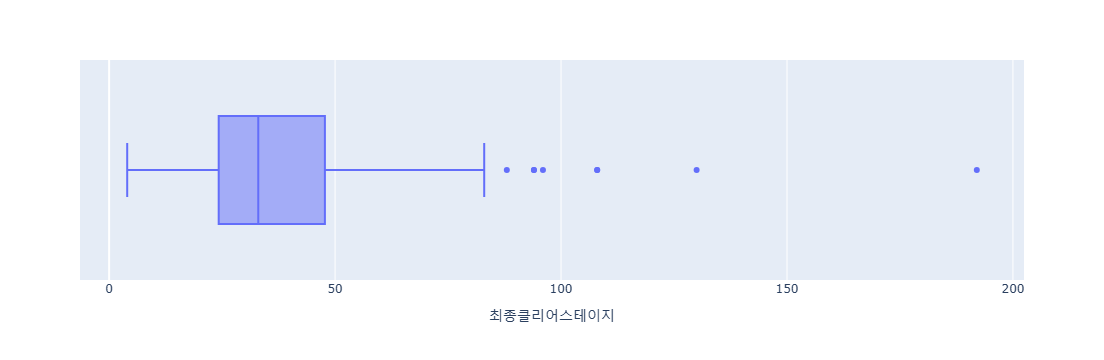

In [135]:
px.box(df3, x='최종클리어스테이지')

In [136]:
# 9.

In [137]:
df1.pivot_table(index='스테이지구분', values='구매횟수', aggfunc=['sum','mean'])

,sum,mean
,구매횟수,구매횟수
스테이지구분,,
0,0.0,NaN
1,4.0,1.00000
2,12.0,1.00000
3,39.0,1.00000
4,237.0,1.19697


In [138]:
# 10.

In [139]:
cond1 = df1['총접속수'] == 7
df1.loc[cond1, 'Target'] = 1 # 'VIP'
df1.loc[~cond1, 'Target'] = 0 # 'normal'

In [140]:
Y = df1['Target'].astype(int)
X = df1[['os타입', '국가','사용아이템수', '루비교환에사용된현금', '캐릭터개방에사용된현금', 
         '스테이지개방에사용된현금','루비충전에사용된현금', '가챠뽑기에사용된현금']]

In [141]:
Y

0        0
1        0
2        1
3        0
4        0
        ..
55804    0
55805    0
55806    0
55807    0
55808    0
Name: Target, Length: 55809, dtype: int32

In [148]:
from sklearn.model_selection import train_test_split # 학습 데이터 검증 데이터 분할
from imblearn.pipeline import make_pipeline # 특성공학 기법을 적용할 파이프라인을 구성
from sklearn.compose import make_column_transformer # 문자와 숫자데이터 병렬로 파이프 구성
from sklearn.impute import KNNImputer # KNN 결측값 대치 기법 (알고리즘을 이용한 대치)
from sklearn.impute import SimpleImputer # 범주형 데이터 결측 처리 (최빈값)
from sklearn.preprocessing import OneHotEncoder # 문자 -> 숫자 (인코딩)
from sklearn.preprocessing import MinMaxScaler # 숫자 -> 숫자 (스케일링)
from sklearn.model_selection import GridSearchCV # 하이퍼파리미텨 튜닝 + 교차검증
from imblearn.combine import SMOTETomek # 불균형 데이터 처리
from sklearn.feature_selection import SelectKBest, f_classif # 변수 선택법
from xgboost import XGBClassifier # 앙상블 살고리즘 학습 수행
from sklearn.metrics import classification_report # 분류모델에 대한 성능 평가 실시

In [143]:
# 학습 데이터 검증데이터 분할
X_train, X_test, Y_train , Y_test = train_test_split(X,Y, test_size=0.3, random_state=1234)

In [144]:
# 숫자 데이터와 문자 데이터 항목구분
numeric_list = X.describe().columns
category_list = X.describe(include='object').columns

In [145]:
# 파이프 라인 구성
numeric_pipe = make_pipeline ( KNNImputer(n_neighbors=5), MinMaxScaler() )
category_pipe = make_pipeline( SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore') )
# handle_unknown='ignore' : 학습 데이터에 범주형 항목이 포함되지 않는 경우

In [151]:
# 전처리 파이프 구성
prepro_pipe = make_column_transformer((numeric_pipe,numeric_list), (category_pipe,category_list))
# prepro_pipe.fit(X_train,Y_train)

In [157]:
model_pipe = make_pipeline(prepro_pipe, SMOTETomek(),
                           SelectKBest(f_classif, k=5), XGBClassifier())
model_pipe.fit(X_train,Y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  Index(['사용아이템수', '루비교환에사용된현금', '캐릭터개방에사용된현금', '스테이지개방에사용된현금', '루비충전에사용된현금',
       '가챠뽑기에사용된현금'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [161]:
# from sklearn.preprocessing import LabelEncoder

# # 레이블 인코더 초기화
# label_encoder = LabelEncoder()

# # 타겟 레이블 인코딩
# Y_train_encoded = label_encoder.fit_transform(Y_train)

# # 모델 파이프라인 구성
# model_pipe = make_pipeline(prepro_pipe, SMOTETomek(), SelectKBest(f_classif, k=5), XGBClassifier()
# )

# # 인코딩된 타겟을 사용하여 모델 학습
# model_pipe.fit(X_train, Y_train_encoded)

In [154]:
# 교차검증과 하이퍼파라미터 튜닝
hyperparameter = {'xgbclassifier__max_depht':range(5,10)}
grid_model = GridSearchCV(model_pipe, param_grid=hyperparameter, cv=3, n_jobs=-1, scoring='f1')

grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

c:\Users\UserK\miniforge3\envs\stat\Lib\site-packages\xgboost\core.py:160: UserWarning:

[11:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "max_depht" } are not used.




In [155]:
# 모델평가
Y_train_pred = best_model.predict(X_train) # 생성된 모델에 X를 넣어 예측값 계산
Y_test_pred = best_model.predict(X_test) 

In [156]:
print(classification_report(Y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     35088
           1       0.78      0.09      0.15      3978

    accuracy                           0.90     39066
   macro avg       0.85      0.54      0.55     39066
weighted avg       0.89      0.90      0.87     39066



# Clustering Part2

- **Mean Shift Clustering**
- 데이터의 분포를 기반으로 클러스터를 찾는 방법
- 이 알고리즘은 데이터 포인트를 중심으로 하는 **커널 함수**를 사용하여, 중심 데이텅 주변 데이터의 평균으로 이동시키는 방식으로 군집화를 수행
    - 커널 밀도 추정 : 각 데이터 포인트에 밀도를 추정하는 단계
    - 이동 : 각 데이터의 현재 지점에서 밀도가 높은 지점으로 평균 지점을 이동
    - 데이터 포인트가 더이상 이동하지 않을 때 까지, 커널 밀도 계산 -> 이동을 반복
    - 수렴한 포인트(더이상 이동하지 않는 포이튼)를 중심으로 인접 데이터들을 묶어 클러스터를 형성
- 클러스터의 개수를 사용자가 지정하지 않아도 됌
- 연속형 자료가 많은 경우에 잘 작동 (실루엣 스코어가 높다)
- 계산 비용이 높다 (시간이 오래 걸림 / 대용량 데이터에 대해서는 많은 시간 소요)

In [160]:
df1 = pd.read_csv('19_Data.csv')

In [162]:
from sklearn.cluster import MeanShift

In [170]:
df2 = df1.drop(columns=['LOT','WAFER'])

- 대역폭 (BandWidth) : 대역폭 클수록 클러스터의 크기가 커짐 / 작으면 작아진다.
    - 커널 함수가 데이터 포인트 주변의 영역을 얼마나 넓게 볼 것 인가

In [189]:
df2['C1'] = MeanShift(bandwidth=50).fit_predict(df2).astype(str)
df2['C1'].value_counts()

C1
0    1291
1     100
3      63
2       1
Name: count, dtype: int64

In [176]:
pd.DataFrame.iteritems = pd.DataFrame.items

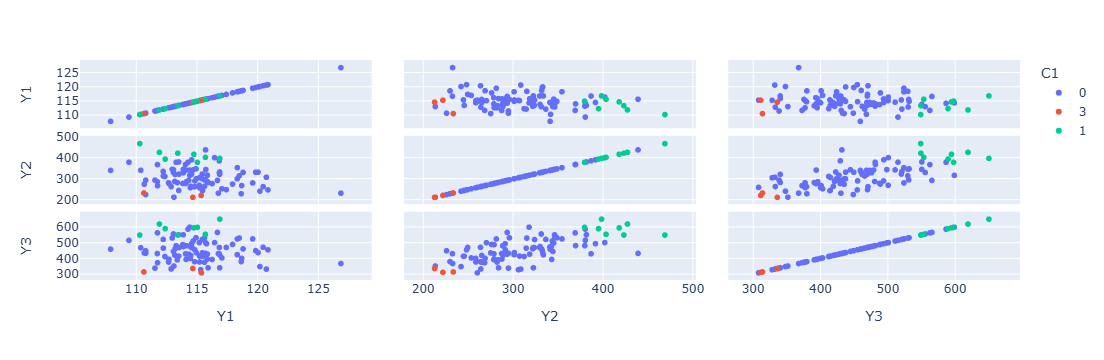

In [190]:
px.scatter_matrix(df2.iloc[:100], dimensions=['Y1','Y2','Y3'], color='C1')

- **DBSCAN (Density-Based Spatial Clustering of Application With Noise)**
- 밀도 기반의 클러스터랑 알고리즘 / 밀도가 높은 지역을 묶어 군집을 형성
- 데이터의 밀도가 낮은 부분을 잡음(Noise)으로 처리
- 이상치 탐지의 목적으로 사용하기도 함
- 작동 개념
    - 핵심 포인트 (Core Point) : 주어진 이웃 포인트의 최소 이웃수 보다 큰 데이터 포인트를 핵심 포인트로 정의
        - 주변에 다른 데이터 포인트가 충분히 많은 지점
    - 이웃 포인트 (Neighborhood Point) : 지정된 데이터 공간 내 하나의 데이터 포인트 주변의 데이터 / 반경 (eps) 
    - 잡음 포인트 (Noise Point) : 핵심 Point 반경 내 벗어난, 이웃포인트가 존재하지 않는 데이터

In [191]:
from sklearn.cluster import DBSCAN

In [194]:
df2['C2'] = DBSCAN().fit_predict(df2).astype(str)
df2['C2'].value_counts() # -1 : Noise Point

C2
-1    1455
Name: count, dtype: int64

In [202]:
df2['C2'] = DBSCAN(eps=30, min_samples=20).fit_predict(df2).astype(str)
df2['C2'].value_counts() # -1 : Noise Point

C2
0     1335
-1     120
Name: count, dtype: int64

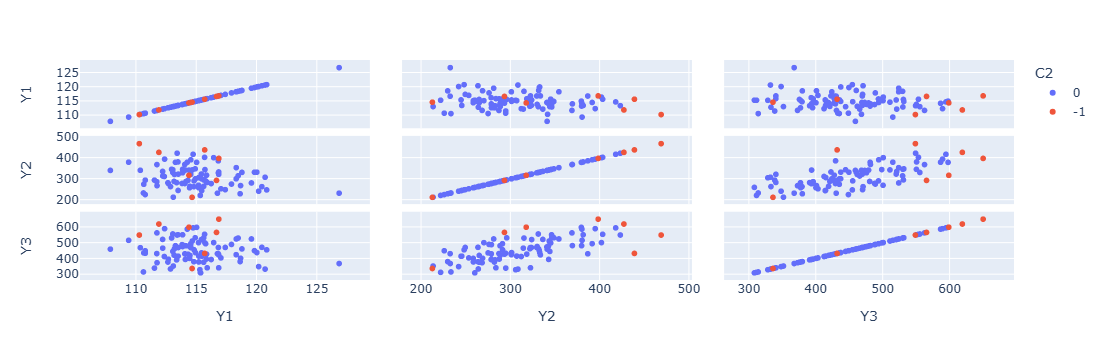

In [200]:
px.scatter_matrix(df2.iloc[:100], dimensions=['Y1','Y2','Y3'], color='C2')

**Gaussian Mixture Model (GMM)**
- 데이터를 여러개의 정교분포로 (확률적으로) 생성하는 모델
- 데이터를 서로 다른 평균과 공분산을 가진 분포로 계산하여 군집을 분할
- 이상치가 없고, 정규성을 잘 따르는 X들의 데이터가 많을 때 적절히 분할 (실루엣 스코어가 높게 생성)

In [204]:
from sklearn.mixture import GaussianMixture

In [206]:
# n_components= : 분포를 몇개로 추정할 지 (군집을 몇개로 나눌 지 선택)
df2['C3'] = GaussianMixture(n_components=3).fit_predict(df2).astype(str)
df2['C3'].value_counts()

c:\Users\UserK\miniforge3\envs\stat\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.



C3
2    1256
1     117
0      82
Name: count, dtype: int64

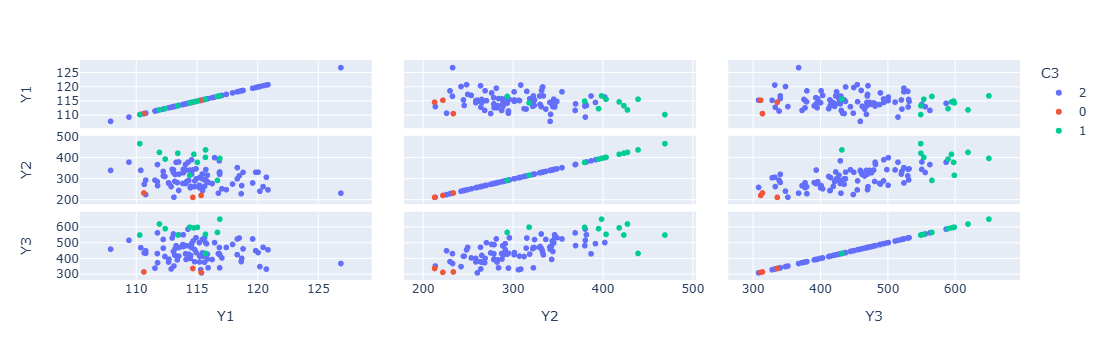

In [207]:
px.scatter_matrix(df2.iloc[:100], dimensions=['Y1','Y2','Y3'], color='C3')

# 연관 분석

- 특정 거래 / 사건 발생했을 때, 함께(빈번하게) 발생하는 또 다른 사건의 규칙(연관규칙)을 데이터로 부터 학습해 도출하는 분석기법
    - 순차 (Sequence) : 사건의 발생(또는 데이터)의 순서를 고려하여 데이터 간의 규칙을 도출 -> 시계열 분석
    - **연관 (Association)** : 데이터의 순서를 고려하지 않고 데이터 간 규칙을 도출
- 연관 규칙은 항목 간 직접적인 인과관계를 의미하지 않음
- 장바구니 분석 (쇼핑) / 이상거래탐지 (금융) / 불량 공정 장비 패턴 탐지 

- **연관 분석 평가 (데이터 간의 연관성이 얼마나 있는가)**
    - 지지도 (support) : 전체 거래(수)에서 A와 B를 동시에 구매한 비율 (0~1)
        - (A와B가 동시에 포함된 거래 수) / (전체 거래 수)

    - 신뢰도 (confidence) : 특정 거래에서 A와 B를 동시에 구매한 비율 (0~1)
        - (A와B가 동시에 포함된 거래 수) / (A 거래 수)

    - 향상도 (Lift) : A를 구매했을 때, B를 구매할 확률을 지표로 계산
        - 두 항목이 서로 독립적인 경우, 얼마나 자주 동시에 두 항목이 발생하는지
        - 향상도가 1보다 큰 경우 : 두 항목이 양의 상관관계
        - 향상도가 1보다 작은 경우 : 두 항목이 음의 상관관계
        - 향상도가 1이면 두 항목이 서로 독립

In [3]:
# 연관분석 라이브러리 설치
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 2.0 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 4.3 MB/s eta 0:00:01
   ------------- -------------------------- 0.5/1.4 MB 4.4 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 7.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 7.1 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.6 MB/s eta 0:00:00


In [4]:
from mlxtend.frequent_patterns import apriori # 아프리오리 알고리즘
from mlxtend.frequent_patterns import association_rules 

In [8]:
df1 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\ML\03_store_product.csv')

In [9]:
df1['Label'] = 1

In [10]:
# 한명의 회원이 특정 일자에 특정 물품을 구매 했다면 -> 1 / 구매하지 않았다면 -> 0
df1_assoc = df1.pivot_table(index=['회원번호','공급일자'], values='Label',
                 aggfunc='min', columns='물품대분류', fill_value=0)

In [11]:
# 빈도 발생 확률 표 계산
freq_item = apriori(df1_assoc, min_support=0.2, use_colnames=True)
freq_item.head(2)

C:\ProgramData\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.499257,(간식)
1,0.536314,(반찬)


- antecedent support : 선행자 지지도 / 선행자 (간식)이 발생한 거래의 비율
    - 전체 거래 중에 간식 거래가 발생한 비율 49.9%
- consequent support : 후행자 지지도 / 후행자 (반찬)이 발생한 거래의 비율
    - 전체 거래 중에 반찬거래가 발생한 비율 53.6%
- support : 전체 거래 중, 반찬과 간식의 거래가 동시에 일어난 비율 29.9%
- confident : 간식 거래들 중에서, 반찬과 간식이 동시에 거래가 진행될 비율 59.96%
- leverage : 두 사건이 함께 발생할 확률과 독립적으로 발생할 확률의 차이를 측정한 지표
  - leverage = 0 : 두 항목은 서로 독립적이다
  - leverage > 0 : 두 항목 간에는 양의 상관관계가 있다.
  - leverage < 0 : 두 항목 간에는 음의 상관관계가 있다.
  - leverage 값 자체가 큼켠 클 수록 두 항목의 관련성이 높다.
- conviction : 두 항목 간의 독립성을 측정하는데 사용하는 지표
  - Convition 값이 1에 가까울 수록 독립 / 1보다 크면 약한 상관관계를 갖는다. / 1보다 작으면 두 항목간의 종속성이 강하다
- zhangs_metric : 연관 규칙 결과의 품질을 평가하는 지표
  - zhangs_metric 값이 높으면 높을 수록, 연관규칙의 품질이 좋다.

In [231]:
df_assoc = association_rules(freq_item, metric='confidence', min_threshold=0.5)
df_assoc

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(반찬),(간식),0.536314,0.499257,0.299386,0.558229,1.118119,0.031627,1.133489,0.227828
1,(간식),(반찬),0.499257,0.536314,0.299386,0.599663,1.118119,0.031627,1.158238,0.210967
2,(수산),(간식),0.337461,0.499257,0.201876,0.598221,1.198221,0.033396,1.246313,0.249690
3,(채소),(간식),0.667037,0.499257,0.358499,0.537449,1.076498,0.025475,1.082568,0.213422
4,(간식),(채소),0.499257,0.667037,0.358499,0.718064,1.076498,0.025475,1.180987,0.141912
5,(간식),(축산물),0.499257,0.653854,0.360659,0.722392,1.104822,0.034218,1.246889,0.189473
6,(축산물),(간식),0.653854,0.499257,0.360659,0.551590,1.104822,0.034218,1.116709,0.274095
7,(수산),(반찬),0.337461,0.536314,0.222882,0.660469,1.231495,0.041897,1.365664,0.283725
8,(채소),(반찬),0.667037,0.536314,0.409809,0.614372,1.145545,0.052068,1.202418,0.381584
9,(반찬),(채소),0.536314,0.667037,0.409809,0.764121,1.145545,0.052068,1.411585,0.274007
